In [1]:
import GDBG
import RRG
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# from paper "A Comparative Study of Topology Design Approaches for HPC Interconnects" Md Atiqul Mollah et. al.
# parameter_list = [(98, 11), (242, 17), (338, 19), (578, 25), (722, 29), (1058, 35)] #(Number of vertices, Number of degree)
parameter_list = [(64, 8), (98, 11) , (242, 17)] #(Number of vertices, Number of degree)

In [3]:
k=1
data_ave_k_shortest_path_length_GDBG = []
data_arc_load_GDBG = []
data_ave_k_shortest_path_length_RRG = []
data_arc_load_RRG = []
for parameters in parameter_list:
    k_shortest_average_lengths_GDBG, arc_loads_GDBG = GDBG.calculate_single_network(parameters[0],parameters[1],k)
    k_shortest_average_lengths_RRG, arc_loads_RRG = RRG.calculate_single_network(parameters[0],parameters[1],k)
    data_ave_k_shortest_path_length_GDBG.append(list(k_shortest_average_lengths_GDBG.values()))
    data_arc_load_GDBG.append(list(arc_loads_GDBG.values()))
    data_ave_k_shortest_path_length_RRG.append(list(k_shortest_average_lengths_RRG.values()))
    data_arc_load_RRG.append(list(arc_loads_RRG.values()))

Calculating shortest paths in GDBG:


Progress: 4032/4032
Calculation completed.
Calculating shortest paths in RRG:
Progress: 4032/4032
Calculation completed.
Calculating shortest paths in GDBG:
Progress: 9506/9506
Calculation completed.
Calculating shortest paths in RRG:
Progress: 9506/9506
Calculation completed.
Calculating shortest paths in GDBG:
Progress: 58322/58322
Calculation completed.
Calculating shortest paths in RRG:
Progress: 58322/58322
Calculation completed.


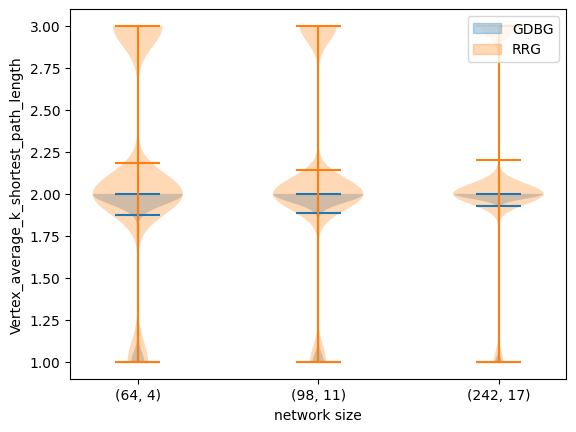

In [7]:
labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

fig = plt.figure(0)
# Create an axes instance
ax = fig.subplots()
# Create the boxplot
x_labels= ["(64, 4)", "(98, 11)", "(242, 17)"]
add_label(ax.violinplot(data_ave_k_shortest_path_length_GDBG, showmeans=True), "GDBG")  
add_label(ax.violinplot(data_ave_k_shortest_path_length_RRG, showmeans=True), "RRG")  
ax.set_xticks(list(range(1, 1+len(x_labels))))
ax.set_xticklabels(x_labels)
ax.set_xlabel("network size (#Router, #radix)")
ax.set_ylabel("Vertex_average_k_shortest_path_length")
plt.legend(*zip(*labels), loc=1)
plt.show()

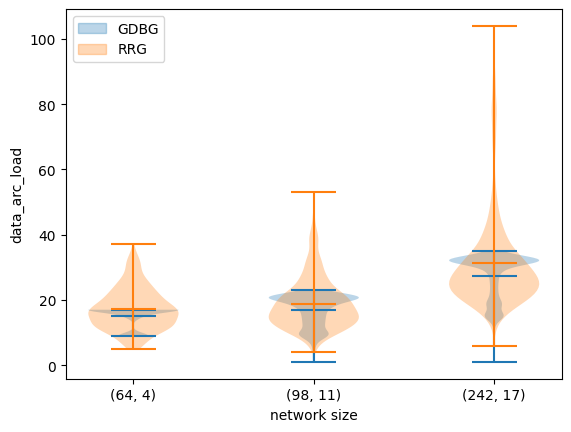

In [5]:
labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

fig = plt.figure(0)
# Create an axes instance
ax = fig.subplots()
# Create the boxplot
x_labels= ["(64, 4)", "(98, 11)", "(242, 17)"]
add_label(ax.violinplot(data_arc_load_GDBG, showmeans=True), "GDBG")  
add_label(ax.violinplot(data_arc_load_RRG, showmeans=True), "RRG")  
ax.set_xticks(list(range(1, 1+len(x_labels))))
ax.set_xticklabels(x_labels)
ax.set_xlabel("network size (#Router, #radix)")
ax.set_ylabel("data_arc_load")
plt.legend(*zip(*labels), loc=2)
plt.show()